<a href="https://colab.research.google.com/github/5rangeclick/DL/blob/DAcrew/%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C_%EA%B2%B0%EC%B8%A1%EC%B9%98_%EC%B1%84%EC%9A%B0%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from collections import Counter
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/raw data/open/train.csv')
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


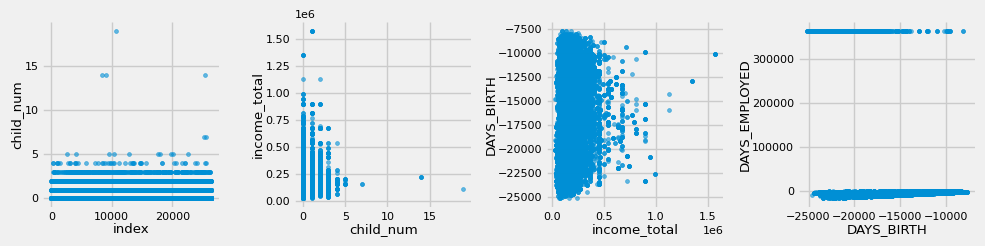

In [ ]:
#애가 18명...?
#양수인 days_birth 0으로 바꿔주기

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/raw data/open/test.csv')
test

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [ ]:
train.keys()

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [ ]:
train.drop(columns = 'index', inplace = True)
test.drop(columns = 'index', inplace = True)

In [ ]:
train.drop(columns = 'FLAG_MOBIL', inplace = True)
test.drop(columns = 'FLAG_MOBIL', inplace = True)

- index: 같은 사용자여도 index는 다를 수 있습니다. (ex) 같은 사람이 복수의 카드를 발급할 경우)

- gender: 성별(남,여)

- car: 차량 소유 여부

- reality: 부동산 소유 여부

- child_num: 자녀 수

- income_total: 연간 소득

- income_type: 소득 분류

['Commercial associate', 'Working', 'State servant(공무원)', 'Pensioner(연금수령자)', 'Student']

- edu_type: 교육 수준

['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

- family_type: 결혼 여부

['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

status가 1일 때 married만 100%

- house_type: 생활 방식

-  DAYS_BIRTH: 출생일 / 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

- DAYS_EMPLOYED: 업무 시작일 / 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미 / 양수 값은 고용되지 않은 상태를 의미함

- FLAG_MOBIL: 핸드폰 소유 여부

- work_phone: 업무용 전화 소유 여부

- phone

- begin_month: 신용카드 발급 월, 신용카드 발급월이 -5인 사용자면 발급한 지 5달된 것.

- email: 이메일 소유 여부

- occyp_type: 직업 유형

- family_size: 가족 규모

- begin_month: 신용카드 발급 월 (데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미)

- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 (0, 1, 2) (낮을 수록 높은 신용의 신용카드 사용자를 의미함)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         26457 non-null  object 
 1   car            26457 non-null  object 
 2   reality        26457 non-null  object 
 3   child_num      26457 non-null  int64  
 4   income_total   26457 non-null  float64
 5   income_type    26457 non-null  object 
 6   edu_type       26457 non-null  object 
 7   family_type    26457 non-null  object 
 8   house_type     26457 non-null  object 
 9   DAYS_BIRTH     26457 non-null  int64  
 10  DAYS_EMPLOYED  26457 non-null  int64  
 11  work_phone     26457 non-null  int64  
 12  phone          26457 non-null  int64  
 13  email          26457 non-null  int64  
 14  occyp_type     18286 non-null  object 
 15  family_size    26457 non-null  float64
 16  begin_month    26457 non-null  float64
 17  credit         26457 non-null  float64
dtypes: flo

In [ ]:
train.describe() #수치형 변수들만을 기준으로 카운트, 평균, 표준편차, 최소/최댓값, 4분위 수를 기준으로 25%, 50%, 75%에 해당하는 값들을 테이블로 출력

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


# 소득수준별 직업 비교: income_total, income_type, occyp_type, DAYS_EMPLOYED

결측치: 무직과 무직이 아닌 unk로 나누기

  -work phone이 있다면 unk


  -income이 있다면 unk으로 처리? (Pensioner(연금수령자)의 연금은 income에 해당하지 않는?)  
  ==> 연금수령자들도 income이 있고, 고용상태에 있는 사람은 11명


  -DAYS_EMPLOYED가 양수면 무직



  

In [ ]:
train['occyp_type'].unique() #열에 어떤 값들이 있는지

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [ ]:
occyp_counts = train['occyp_type'].value_counts() #값들이 몇 번씩 등장하는지
occyp_counts

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

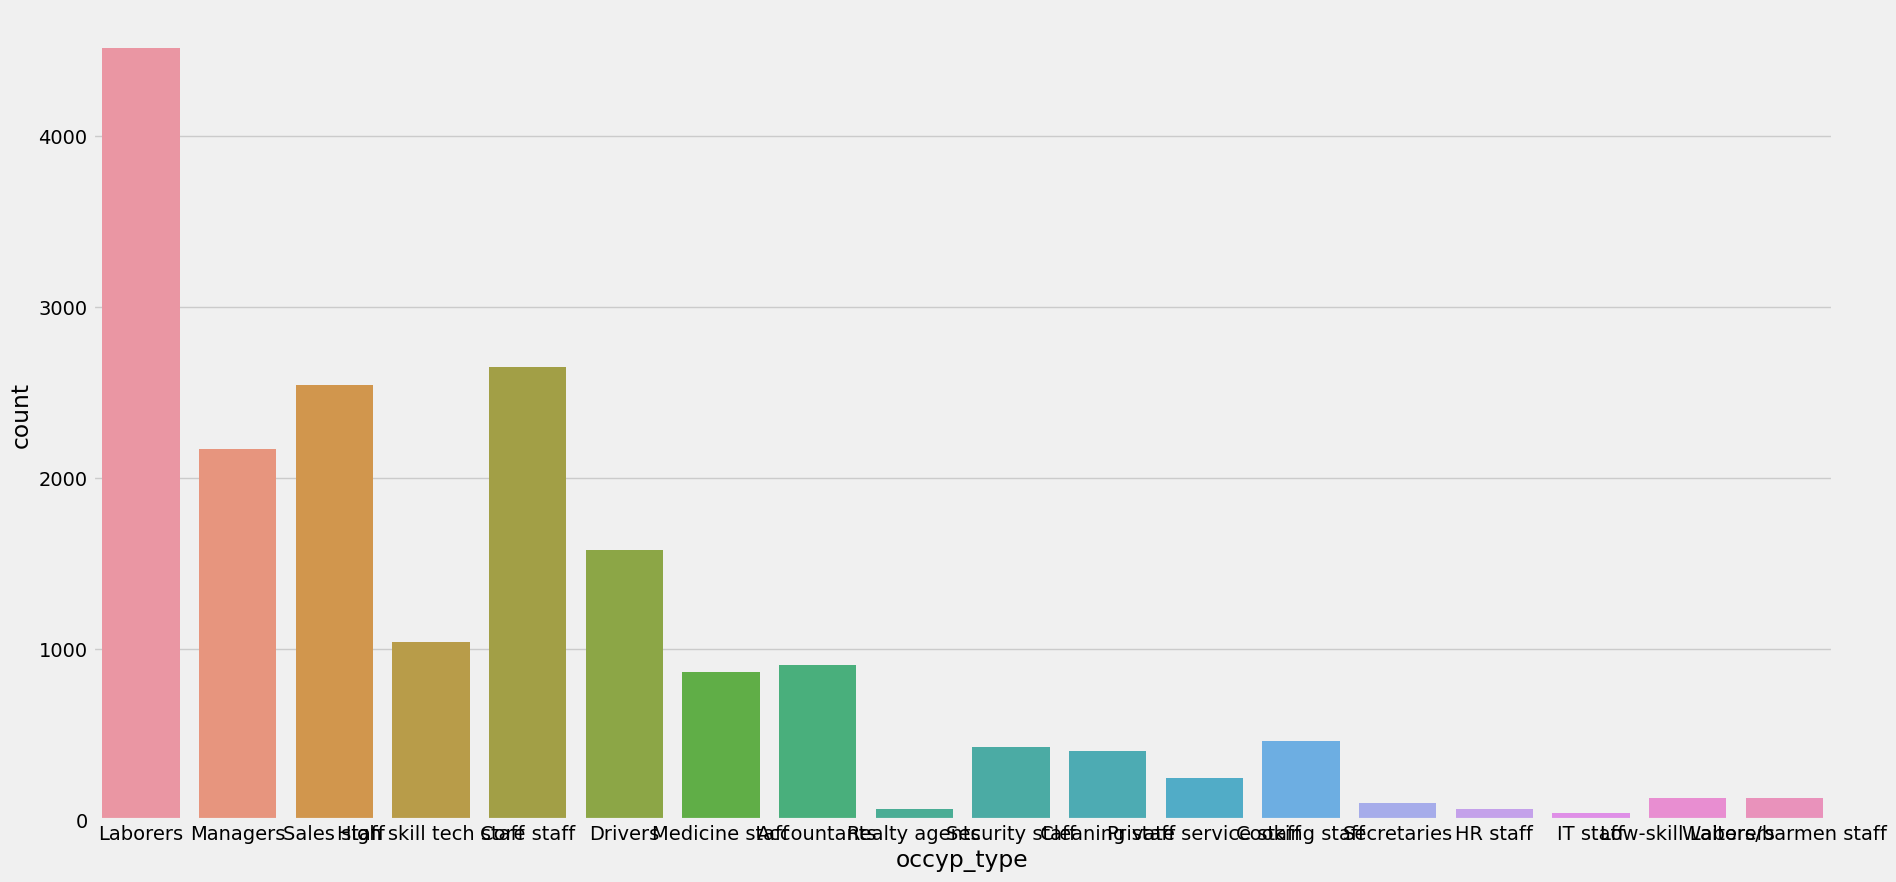

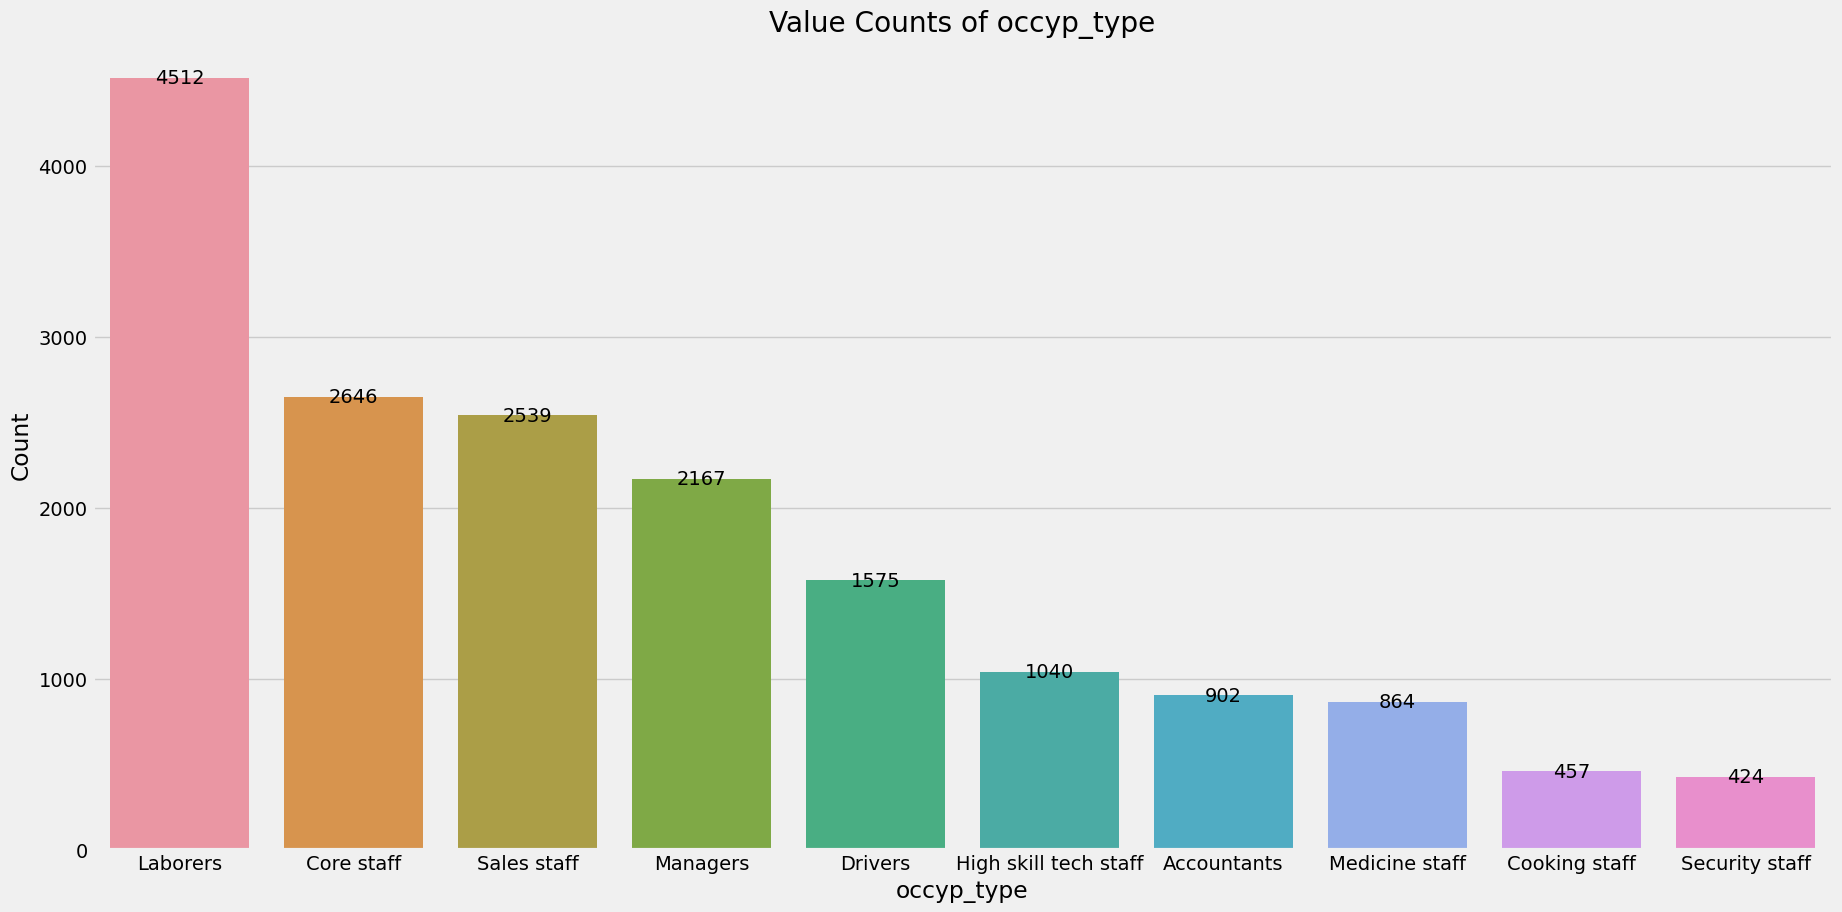

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(x='occyp_type', data=train)

##################################################

# 상위 10개 값만
top_10_values = occyp_counts[:10]

plt.figure(figsize=(20, 10))

# 그래프에 값의 빈도수를 표시
for index, value in enumerate(top_10_values):
    plt.text(index, value, str(value), ha='center', va='center') # index와 value 값을 활용하여 각 막대 위에 빈도수를 텍스트로 표시,  ha='center', va='bottom': 가로로는 센터, 세로로는 아래

# Seaborn의 막대 그래프를 사용하여 상위 10개 값의 비율을 시각화합니다.
sns.countplot(x='occyp_type', data=train, order=top_10_values.index)

# 그래프의 제목과 축 레이블을 설정
plt.title('Value Counts of occyp_type')
plt.xlabel('occyp_type')
plt.ylabel('Count')

plt.show()

In [ ]:
def bin_income_total(income):
    bins = pd.qcut(income, q=5, labels=False)
    return bins

# 'income_total' 열을 5개의 구간으로 나눈 결과를 'income_category' 열에 추가 (동일한 개수로 다섯 구간 나눠줌)
train['income_category'] = bin_income_total(train['income_total'])

# 결과 출력
print(train)

      gender car reality  child_num  income_total           income_type  \
0          F   N       N          0      202500.0  Commercial associate   
1          F   N       Y          1      247500.0  Commercial associate   
2          M   Y       Y          0      450000.0               Working   
3          F   N       Y          0      202500.0  Commercial associate   
4          F   Y       Y          0      157500.0         State servant   
...      ...  ..     ...        ...           ...                   ...   
26452      F   N       N          2      225000.0         State servant   
26453      F   N       Y          1      180000.0               Working   
26454      F   Y       N          0      292500.0               Working   
26455      M   N       Y          0      171000.0               Working   
26456      F   N       N          0       81000.0               Working   

                            edu_type           family_type  \
0                   Higher education 

In [ ]:
train['income_category'].value_counts()

0    6191
3    5389
2    5294
4    4856
1    4727
Name: income_category, dtype: int64

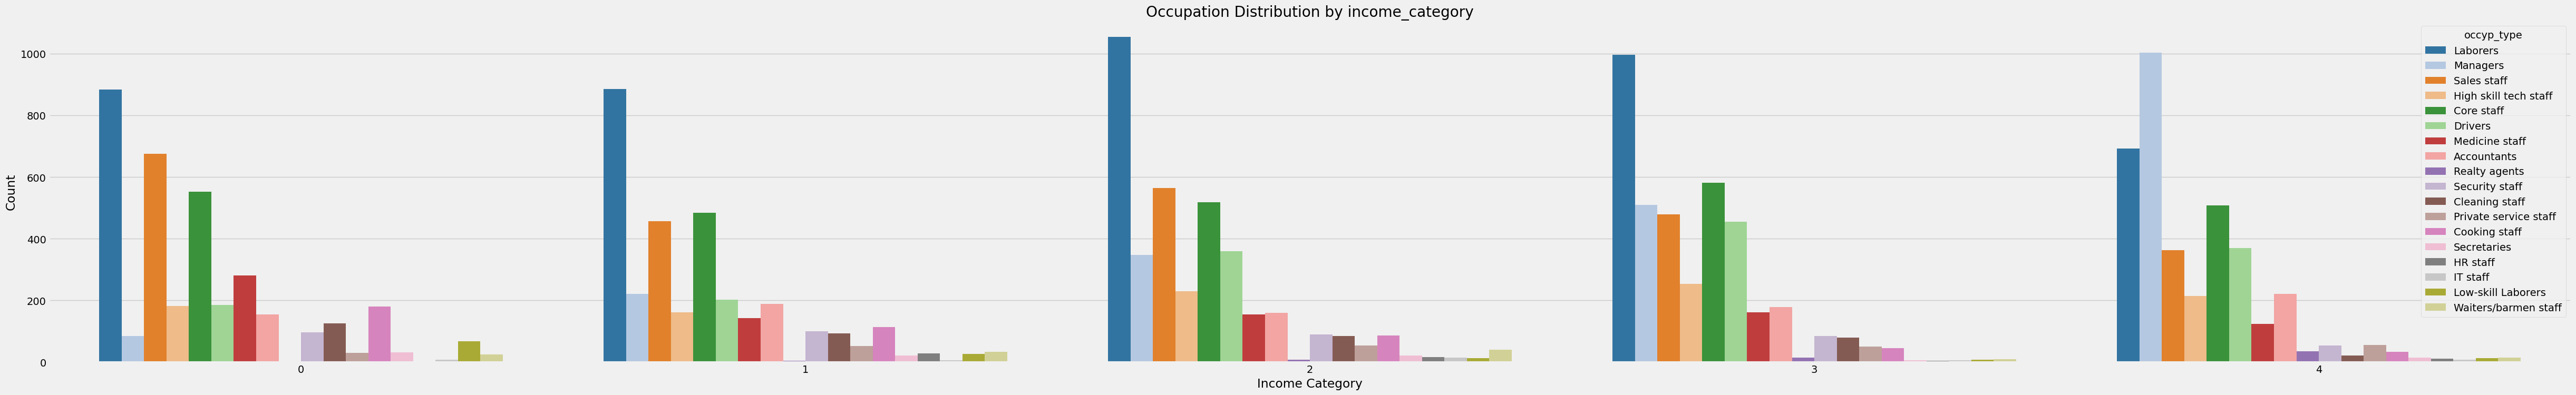

In [ ]:
# 'income_category'별 직업군(occyp_type) 분포 시각화
plt.figure(figsize=(55, 8))
sns.countplot(x='income_category', hue='occyp_type', data=train, palette='tab20')

# 그래프의 제목과 축 레이블을 설정
plt.title('Occupation Distribution by income_category')
plt.xlabel('Income Category')
plt.ylabel('Count')

plt.legend(title='occyp_type', loc='upper right')

plt.show()

#managers는 income이 엄청나다!

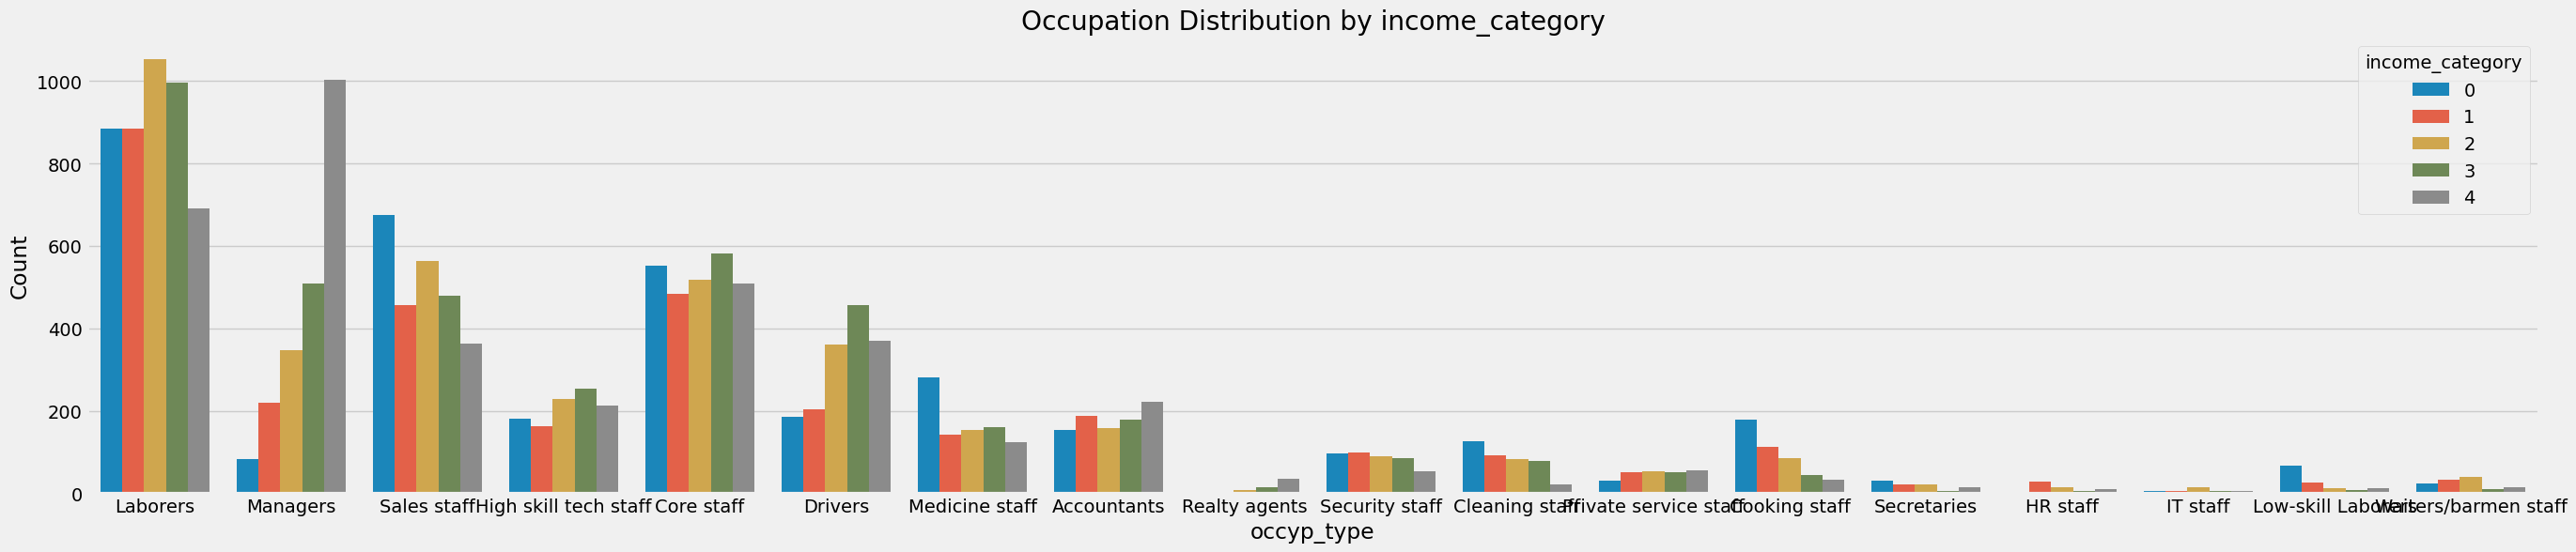

In [ ]:
# 직업군(occyp_type)별 'income_category' 분포 시각화
plt.figure(figsize=(30, 6))
sns.countplot(x='occyp_type', hue='income_category', data=train)

# 그래프의 제목과 축 레이블을 설정
plt.title('Occupation Distribution by income_category')
plt.xlabel('occyp_type')
plt.ylabel('Count')

plt.legend(title='income_category', loc='upper right')

plt.show()

#managers는 주로 income 많고, cleaning staff, cooking staff, Low-skill Laborers은 주로 income 적다. 대체로 ~ staff들은 income 낮은 편이다.

In [ ]:
train['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

Commercial associate (상업 파트너):

상업적인 관계를 맺고 있는 직업군으로, 기업과의 파트너십이나 계약 등으로 소득을 얻는 사람들을 의미합니다. 상업 파트너는 기업과의 계약 또는 협력을 통해 수익을 창출하는 ***`자영업자, 사업가, 자문 컨설턴트`*** 등이 포함될 수 있습니다.



Working (근로자):

단순히 일자리에서 일하는 사람들을 일컫는 말로, 직원, 노동자, 근로자 등이 해당됩니다. 근로자들은 회사나 기업에서 정규직, 비정규직, 계약직 등으로 일하는 사람들을 포함합니다.



두 직업군 모두 일을 하며 수입을 창출하는데, 'Commercial associate'는 주로 상업적인 관계를 맺고 수익을 얻는 경제 활동을 하며 'Working'은 단순히 일자리에서 근로하는 직업군을 의미합니다.

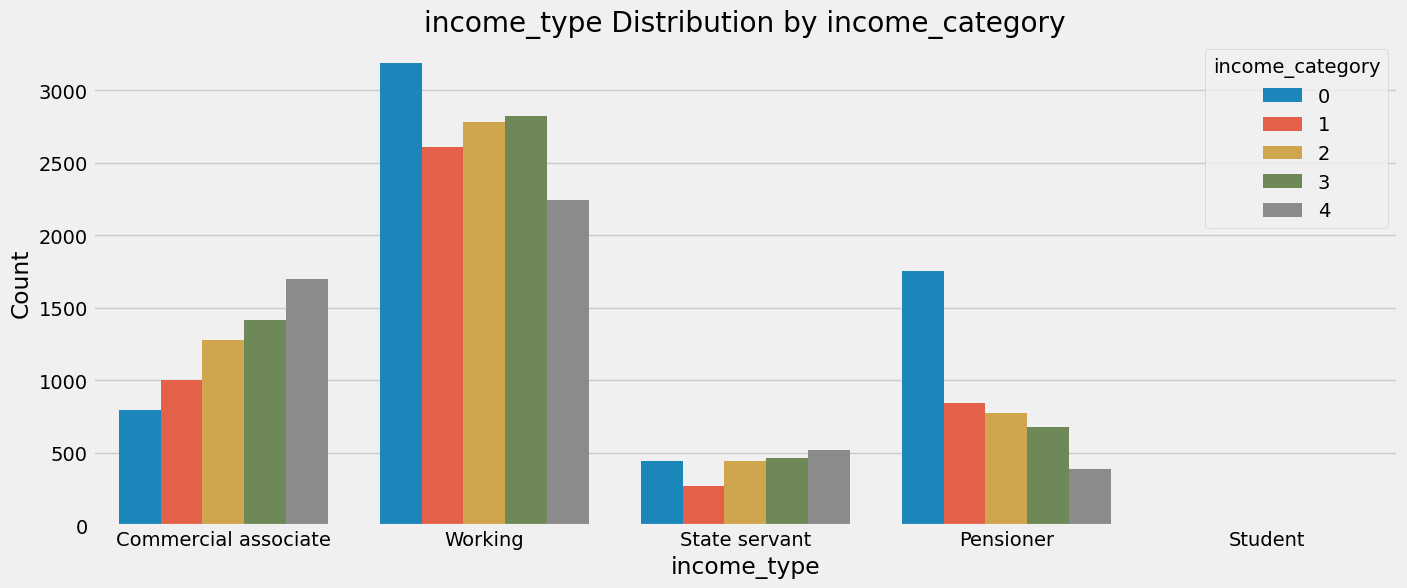

In [ ]:
# income_type(Working, Commercial associate, State servant, Student)별 'income_category' 분포 시각화
plt.figure(figsize=(15, 6))
sns.countplot(x='income_type', hue='income_category', data=train)

# 그래프의 제목과 축 레이블을 설정
plt.title('income_type Distribution by income_category')
plt.xlabel('income_type')
plt.ylabel('Count')

plt.legend(title='income_category', loc='upper right')

plt.show()

#연금수령자는 연간 소득이 없는 것은 아니었음. (연금도 income으로 쳐주는 건가?)
#자영업자는 대체로 소득이 높음

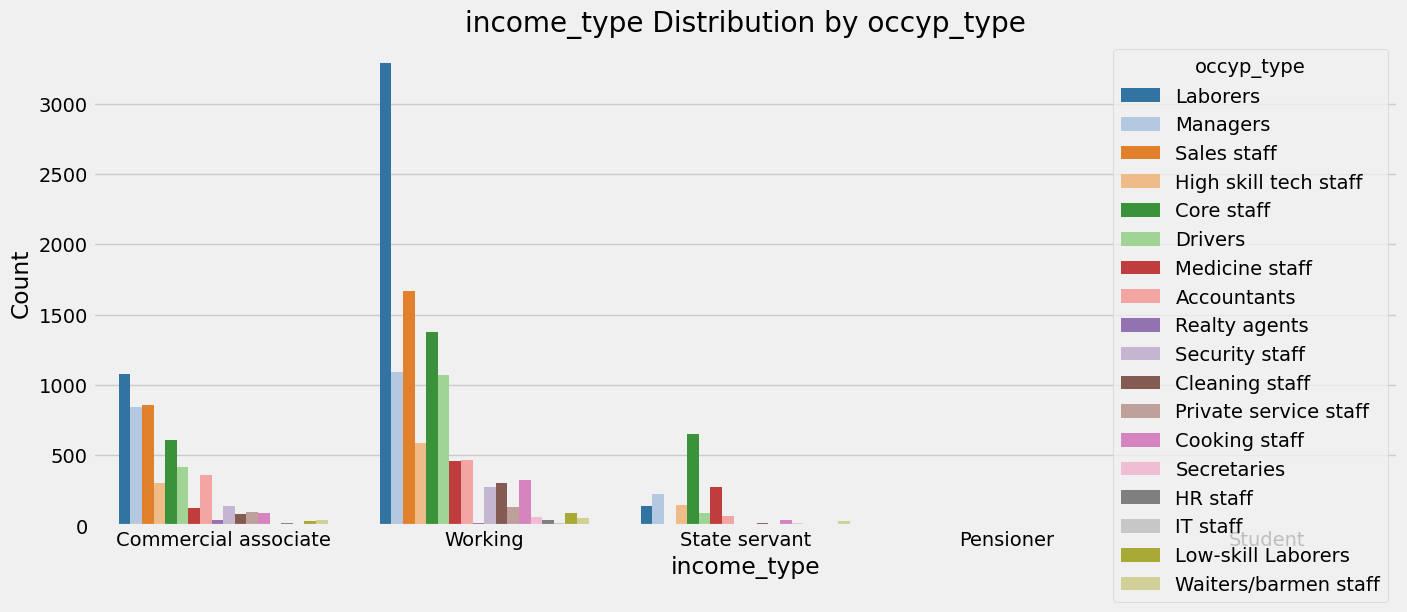

In [ ]:
# income_type별 'occyp_type' 분포 시각화
plt.figure(figsize=(15, 6))
sns.countplot(x='income_type', hue='occyp_type', data=train, palette='tab20')

# 그래프의 제목과 축 레이블을 설정
plt.title('income_type Distribution by occyp_type')
plt.xlabel('income_type')
plt.ylabel('Count')

plt.legend(title='occyp_type', loc='upper right')

plt.show()

#공무원은 대부분 core staff로 되어있음
#자영업자도 occyp가 다양... commercial associate를 사업자/자영업자로 보는 게 맞을까?

In [ ]:
Pensioner_df = train.loc[train['income_type'] == 'Pensioner']
Pensioner_df

#Pensioner는 occyp_type이 NaN인 것으로 보인다.
#Pensioner는 DAYS_EMPLOYED도 365243인 것으로 보인다. 365243: 무직

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,income_category
14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,0,1,0,NaN,1.0,-41.0,2.0,2
18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,0,0,0,NaN,2.0,-37.0,2.0,3
21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,0,1,0,NaN,2.0,-7.0,2.0,2
24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,0,1,0,NaN,1.0,-5.0,2.0,3
46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,0,1,0,NaN,1.0,-24.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21151,365243,0,0,1,NaN,1.0,-60.0,1.0,3
26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22314,365243,0,1,0,NaN,2.0,-17.0,1.0,0
26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,0,0,0,NaN,2.0,-57.0,2.0,0
26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,0,0,0,NaN,1.0,-43.0,2.0,0


In [ ]:
Pensioner_df['DAYS_EMPLOYED'].value_counts() #연금수령자 4449명 중 현재 고용상태에 있는사람은 11명. 다 무직은 아니지만 그냥 무직으로 봐도 될 듯.

 365243    4438
-1325         1
-2208         1
-2745         1
-586          1
-198          1
-443          1
-3680         1
-673          1
-672          1
-620          1
-5521         1
Name: DAYS_EMPLOYED, dtype: int64

In [ ]:
train['DAYS_EMPLOYED'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26457 entries, 0 to 26456
Series name: DAYS_EMPLOYED
Non-Null Count  Dtype
--------------  -----
26457 non-null  int64
dtypes: int64(1)
memory usage: 206.8 KB


In [ ]:
#Pensioner 중 occyp_type이 있는 사람의 직업
Pensioner_df['occyp_type'].value_counts()# = train.loc[train['income_type'] == 'Pensioner', 'occyp_type'].value_counts()

Laborers          3
Core staff        2
Medicine staff    1
Drivers           1
Accountants       1
Managers          1
Name: occyp_type, dtype: int64

In [ ]:
#일단 DAYS_EMPLOYED가 양수면 무직으로 결측치 처리
train.loc[train['DAYS_EMPLOYED'] > 0, 'occyp_type'] = 'inoccupation'

In [ ]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,income_category
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0,3
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0,3
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0,2.0,4
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0,3
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,0,0,0,Core staff,4.0,-2.0,1.0,3
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,0,0,0,NaN,2.0,-47.0,2.0,2
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,0,0,0,Core staff,2.0,-25.0,2.0,4
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,0,0,0,Laborers,1.0,-59.0,2.0,2


In [ ]:
train['DAYS_EMPLOYED'].value_counts()

 365243    4438
-401         57
-1539        47
-200         45
-2087        44
           ... 
-10475        1
-2202         1
-2552         1
-680          1
-4973         1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64

In [ ]:
train['occyp_type'].isna().value_counts()
#NaN값 8171개에서 3733으로 줄었음.

False    22724
True      3733
Name: occyp_type, dtype: int64

In [ ]:
train.loc[train['income_type'] == 'Pensioner', 'occyp_type'].value_counts()

In [ ]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,income_category
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0,3
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0,3
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0,2.0,4
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0,3
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,0,0,0,Core staff,4.0,-2.0,1.0,3
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,0,0,0,NaN,2.0,-47.0,2.0,2
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,0,0,0,Core staff,2.0,-25.0,2.0,4
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,0,0,0,Laborers,1.0,-59.0,2.0,2


In [ ]:
train[train['occyp_type'].isna()]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,income_category
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0,3
8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,0,0,1,NaN,3.0,-38.0,2.0,2
19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,0,0,0,NaN,2.0,-7.0,2.0,2
20,M,N,N,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-19850,-1753,0,1,0,NaN,2.0,-35.0,2.0,2
23,M,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-14542,-444,1,1,1,NaN,2.0,-18.0,2.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26433,F,Y,N,0,121500.0,State servant,Higher education,Married,House / apartment,-19912,-4973,0,1,0,NaN,2.0,-31.0,2.0,1
26435,F,N,N,1,126000.0,Working,Secondary / secondary special,Widow,House / apartment,-19691,-473,0,0,0,NaN,2.0,-40.0,2.0,1
26437,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13015,-3647,0,0,0,NaN,2.0,-13.0,2.0,2
26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,0,NaN,2.0,-2.0,1.0,0


In [ ]:
#work_phone이 있는 사람은 inoccupation이 아니므로 occyp_type를 unk로 결측치 채우기
train.loc[train['work_phone'] == 1, 'occyp_type'] = 'unk'

In [ ]:
train[train['occyp_type'].isna()]
#Nan값 3733개에서 2765개로 줄었음

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,income_category
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0,3
8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,0,0,1,NaN,3.0,-38.0,2.0,2
14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,0,1,0,NaN,1.0,-41.0,2.0,2
18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,0,0,0,NaN,2.0,-37.0,2.0,3
19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,0,0,0,NaN,2.0,-7.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26437,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13015,-3647,0,0,0,NaN,2.0,-13.0,2.0,2
26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,0,0,0,NaN,2.0,-57.0,2.0,0
26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,0,0,0,NaN,1.0,-43.0,2.0,0
26443,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22286,365243,0,0,0,NaN,1.0,-21.0,1.0,0


In [ ]:
train[train['occyp_type'].isna()]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,income_category
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0,3
8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,0,0,1,NaN,3.0,-38.0,2.0,2
19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,0,0,0,NaN,2.0,-7.0,2.0,2
20,M,N,N,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-19850,-1753,0,1,0,NaN,2.0,-35.0,2.0,2
27,M,Y,Y,0,405000.0,State servant,Secondary / secondary special,Married,House / apartment,-17309,-3500,0,0,0,NaN,2.0,-57.0,2.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26430,F,N,Y,0,112500.0,Working,Incomplete higher,Civil marriage,House / apartment,-9301,-1751,0,0,0,NaN,2.0,-19.0,2.0,0
26433,F,Y,N,0,121500.0,State servant,Higher education,Married,House / apartment,-19912,-4973,0,1,0,NaN,2.0,-31.0,2.0,1
26435,F,N,N,1,126000.0,Working,Secondary / secondary special,Widow,House / apartment,-19691,-473,0,0,0,NaN,2.0,-40.0,2.0,1
26437,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13015,-3647,0,0,0,NaN,2.0,-13.0,2.0,2


In [ ]:
#나머지 결측치에 대해서는 income_category가 0인 사람들(연간소득 5단계 중 가장 소득이 적은 경우)을 무직으로 보거나 income_total이 일정값 이하면 무직으로.

In [ ]:
train

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,income_category
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,0,0,0,NaN,2.0,-6.0,1.0,3
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,0,0,1,Laborers,3.0,-5.0,1.0,3
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,0,1,0,Managers,2.0,-22.0,2.0,4
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,0,1,0,Sales staff,2.0,-37.0,0.0,3
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,0,0,0,Managers,2.0,-26.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,0,0,0,Core staff,4.0,-2.0,1.0,3
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,0,0,0,NaN,2.0,-47.0,2.0,2
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,0,0,0,Core staff,2.0,-25.0,2.0,4
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,0,0,0,Laborers,1.0,-59.0,2.0,2


In [ ]:
#최소값 27000 최대값 1575000
#달러라면 1575000=20억, 27000=3000만원

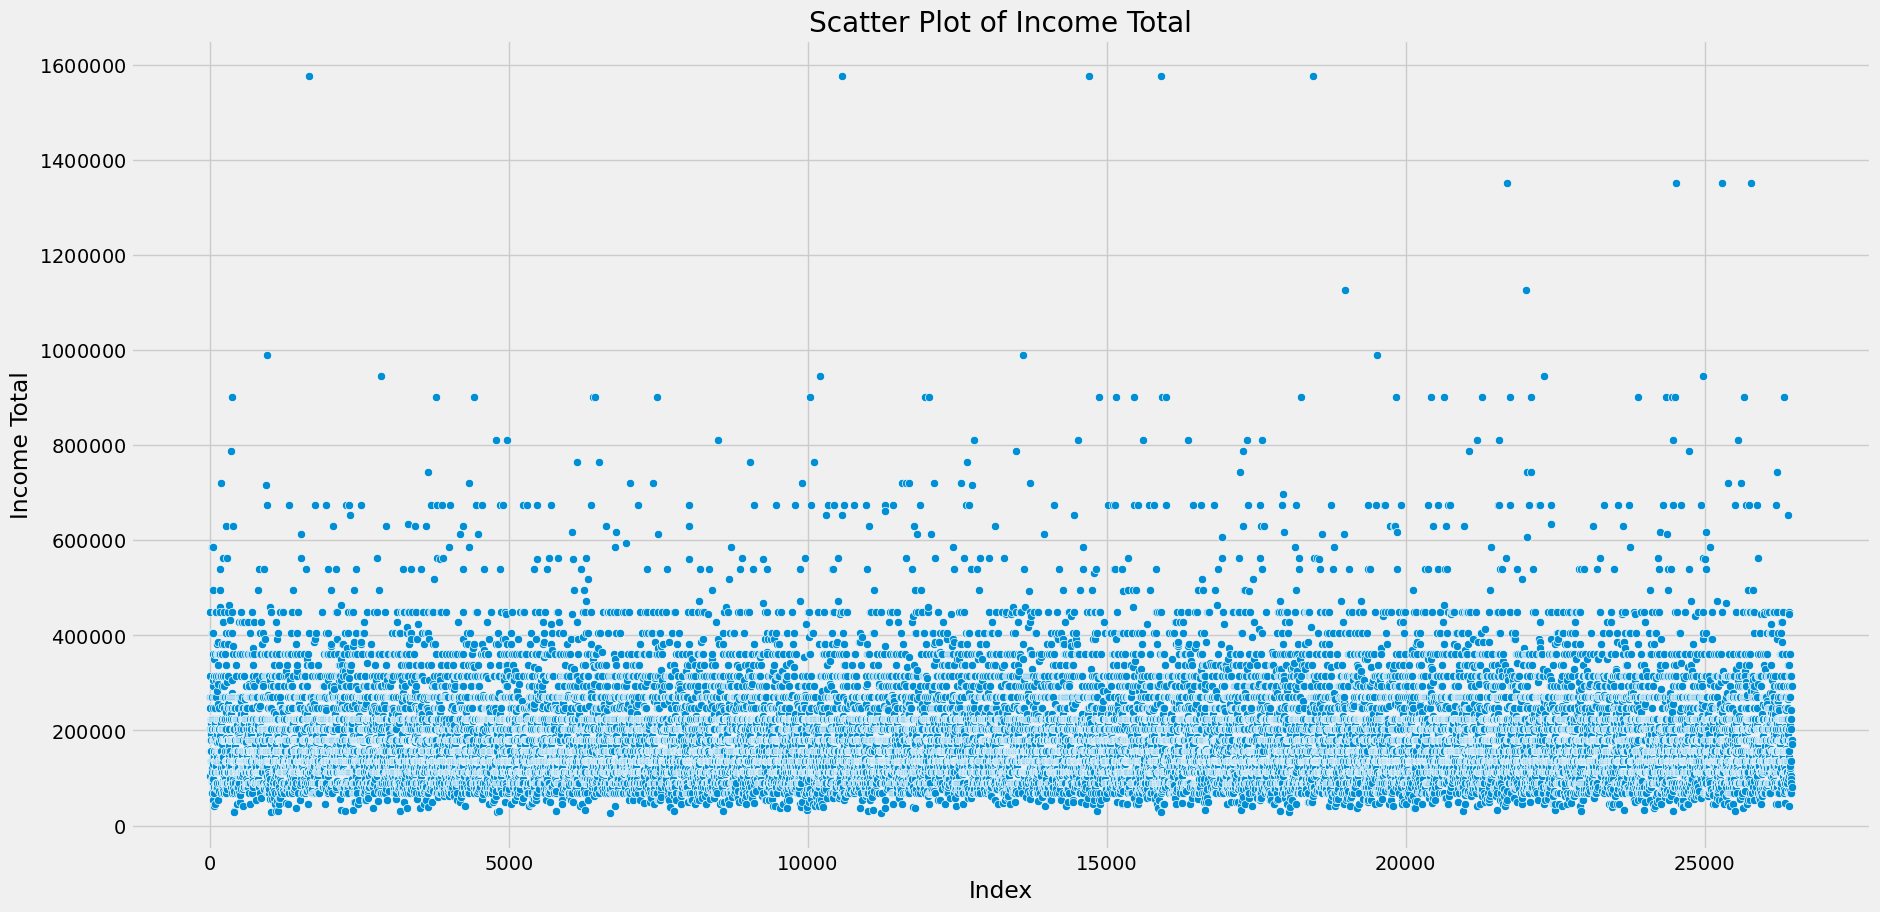

In [ ]:
# 'income_total'을 점으로 나타내는 scatterplot 그리기
plt.figure(figsize=(20, 10))
sns.scatterplot(data=train, x=train.index, y='income_total')
plt.xlabel('Index')
plt.ylabel('Income Total')
plt.title('Scatter Plot of Income Total')

# y축 눈금을 숫자로 표시하도록 설정
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', useOffset=False)

plt.show()

In [ ]:
train['income_total'].describe()
#평균 연간소득은 187306

count    2.645700e+04
mean     1.873065e+05
std      1.018784e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: income_total, dtype: float64

In [ ]:
# 'income_total'의 하위 5퍼센트에 해당하는 값을 구하기
lower_5_percentile = train['income_total'].quantile(0.05)

# 하위 5퍼센트에 해당하는 값들만 출력(총 1264명)
lower_5_percentile_rows = train[train['income_total'] < lower_5_percentile]

In [ ]:
lower_5_percentile_rows['occyp_type'].value_counts()
#하위 5퍼센트의 직업은 다수가 무직이었음!

inoccupation             507
unk                      356
Laborers                  92
Sales staff               65
Core staff                51
Cooking staff             35
Medicine staff            27
Cleaning staff            19
High skill tech staff     10
Security staff             9
Managers                   7
Accountants                6
Waiters/barmen staff       4
Secretaries                4
Low-skill Laborers         2
Drivers                    1
Name: occyp_type, dtype: int64

In [ ]:
#연간소득 하위 10퍼센트는?
#무직이 727, 직업을 알 순 없지만 있긴 있는 unk가 567.
#연간소득 하위 10퍼센트인 unk의 직업을 Laborers로 넣어줘도 될까?

# income_total의 10% 분위수 값
quantile_10 = train['income_total'].quantile(0.1)

# income_total이 10% 분위수보다 작은 행들의 'occyp_type'의 빈도수
train[train['income_total'] < quantile_10]['occyp_type'].value_counts()

inoccupation             727
unk                      567
Laborers                 137
Sales staff               98
Core staff                84
Cooking staff             52
Medicine staff            40
Cleaning staff            27
High skill tech staff     21
Security staff            13
Managers                  11
Low-skill Laborers        11
Accountants                9
Drivers                    8
Waiters/barmen staff       4
Secretaries                4
Private service staff      3
Name: occyp_type, dtype: int64

In [ ]:
#연간소득 상위 10퍼센트도 확인

# income_total의 90% 분위수 값을 구함
quantile_90 = train['income_total'].quantile(0.9)

# income_total이 90% 분위수보다 큰 행들의 'occyp_type'의 빈도수를 계산
train[train['income_total'] > quantile_90]['occyp_type'].value_counts()

#상위 10퍼센트 중 가장 많은 직업군은 Managers니까 상위 10퍼센트인 unk의 직업도 Managers로 넣어줘도 될까?
#Core staff는 하위 10퍼센트와 상위 10퍼센트 둘 다에서 빈도 수가 상위권이다.
#Core staf 빼고는 다른 스태프들 중 돈 많이 버는 스태프 / 돈 적게 버는 스태프로 이분화하는 건 어떨까?

Managers                 412
unk                      411
Core staff               189
inoccupation             132
Laborers                 126
Drivers                  113
Sales staff              112
Accountants               83
High skill tech staff     51
Security staff            29
Medicine staff            25
Private service staff     17
Realty agents              8
Cooking staff              8
Secretaries                4
IT staff                   3
Low-skill Laborers         2
Cleaning staff             2
HR staff                   2
Waiters/barmen staff       1
Name: occyp_type, dtype: int64

In [ ]:
train.loc[train['occyp_type'] == 'unk', 'occyp_type'].value_counts()

unk    5946
Name: occyp_type, dtype: int64

In [ ]:
train.loc[train['work_phone'] == 1, 'occyp_type'] = 'unk'

In [ ]:
#하위unk 411, 상위unk 567 더해도 unk 1000개밖에 해결을 못하니까... 상하위 20퍼센트로?

#Managers가 연간소득 높은 거 빼고는 직업과 연간소득이 생각보다 관련이 적은가
#이렇게 볼 게 아니라 전체 특정직업 대비 상위 10퍼센트의 그 직업으로 봐야할 텐데

In [ ]:
#income_type를 힌트로 아직 unk인 것들의 occyp_type을 채워보자

In [ ]:
train['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [ ]:
#아까 채운 무직 포함해서 인컴타입별 직업타입을 보자

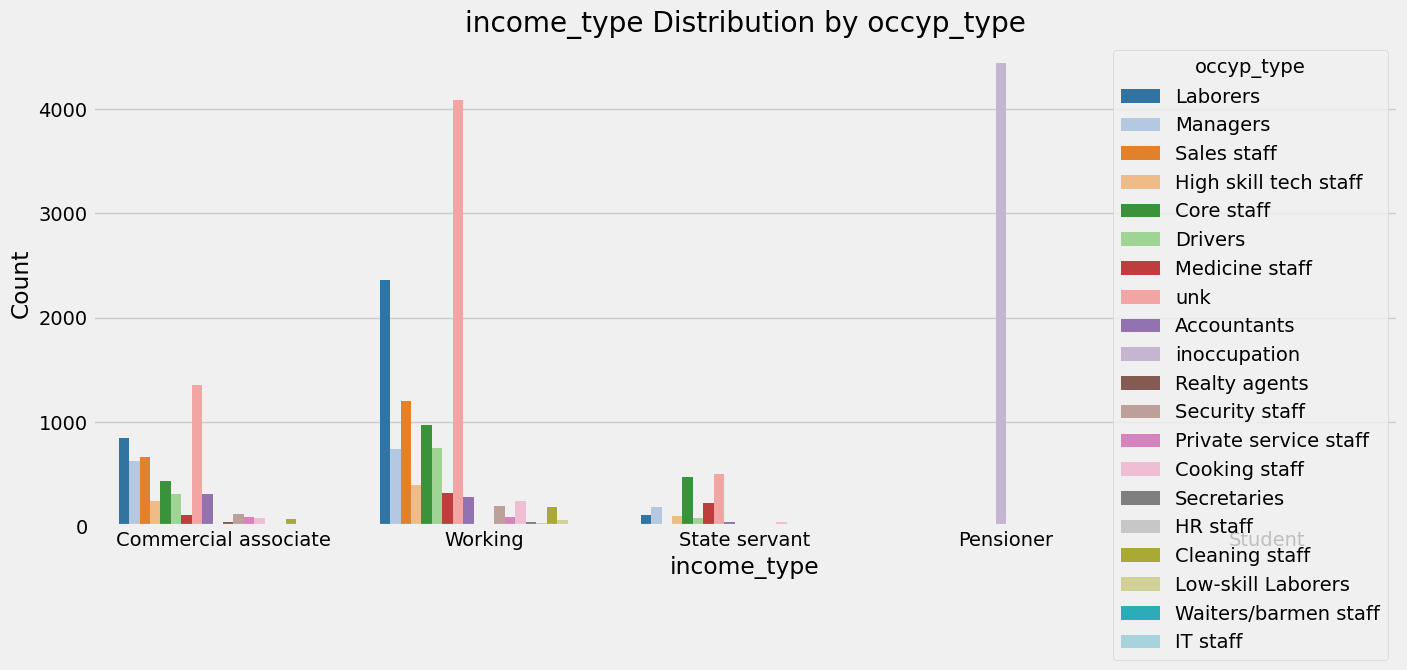

In [ ]:
# income_type별 'occyp_type' 분포 시각화
plt.figure(figsize=(15, 6))
sns.countplot(x='income_type', hue='occyp_type', data=train, palette='tab20')

# 그래프의 제목과 축 레이블을 설정
plt.title('income_type Distribution by occyp_type')
plt.xlabel('income_type')
plt.ylabel('Count')

plt.legend(title='occyp_type', loc='upper right')

plt.show()


In [ ]:
#working인 unk는 laborers로 넣어도 되겠다
#state servant인 unk는 core staff로 넣자

In [ ]:
train[train['occyp_type'] == 'unk']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5946 entries, 10 to 26451
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           5946 non-null   object 
 1   car              5946 non-null   object 
 2   reality          5946 non-null   object 
 3   child_num        5946 non-null   int64  
 4   income_total     5946 non-null   float64
 5   income_type      5946 non-null   object 
 6   edu_type         5946 non-null   object 
 7   family_type      5946 non-null   object 
 8   house_type       5946 non-null   object 
 9   DAYS_BIRTH       5946 non-null   int64  
 10  DAYS_EMPLOYED    5946 non-null   int64  
 11  work_phone       5946 non-null   int64  
 12  phone            5946 non-null   int64  
 13  email            5946 non-null   int64  
 14  occyp_type       5946 non-null   object 
 15  family_size      5946 non-null   float64
 16  begin_month      5946 non-null   float64
 17  credit      

In [ ]:
train['occyp_type'].value_counts()

unk                      5946
inoccupation             4438
Laborers                 3326
Core staff               1888
Sales staff              1876
Managers                 1550
Drivers                  1136
High skill tech staff     744
Medicine staff            647
Accountants               640
Cooking staff             366
Security staff            321
Cleaning staff            263
Private service staff     188
Low-skill Laborers         79
Waiters/barmen staff       76
Secretaries                70
HR staff                   55
Realty agents              47
IT staff                   36
Name: occyp_type, dtype: int64

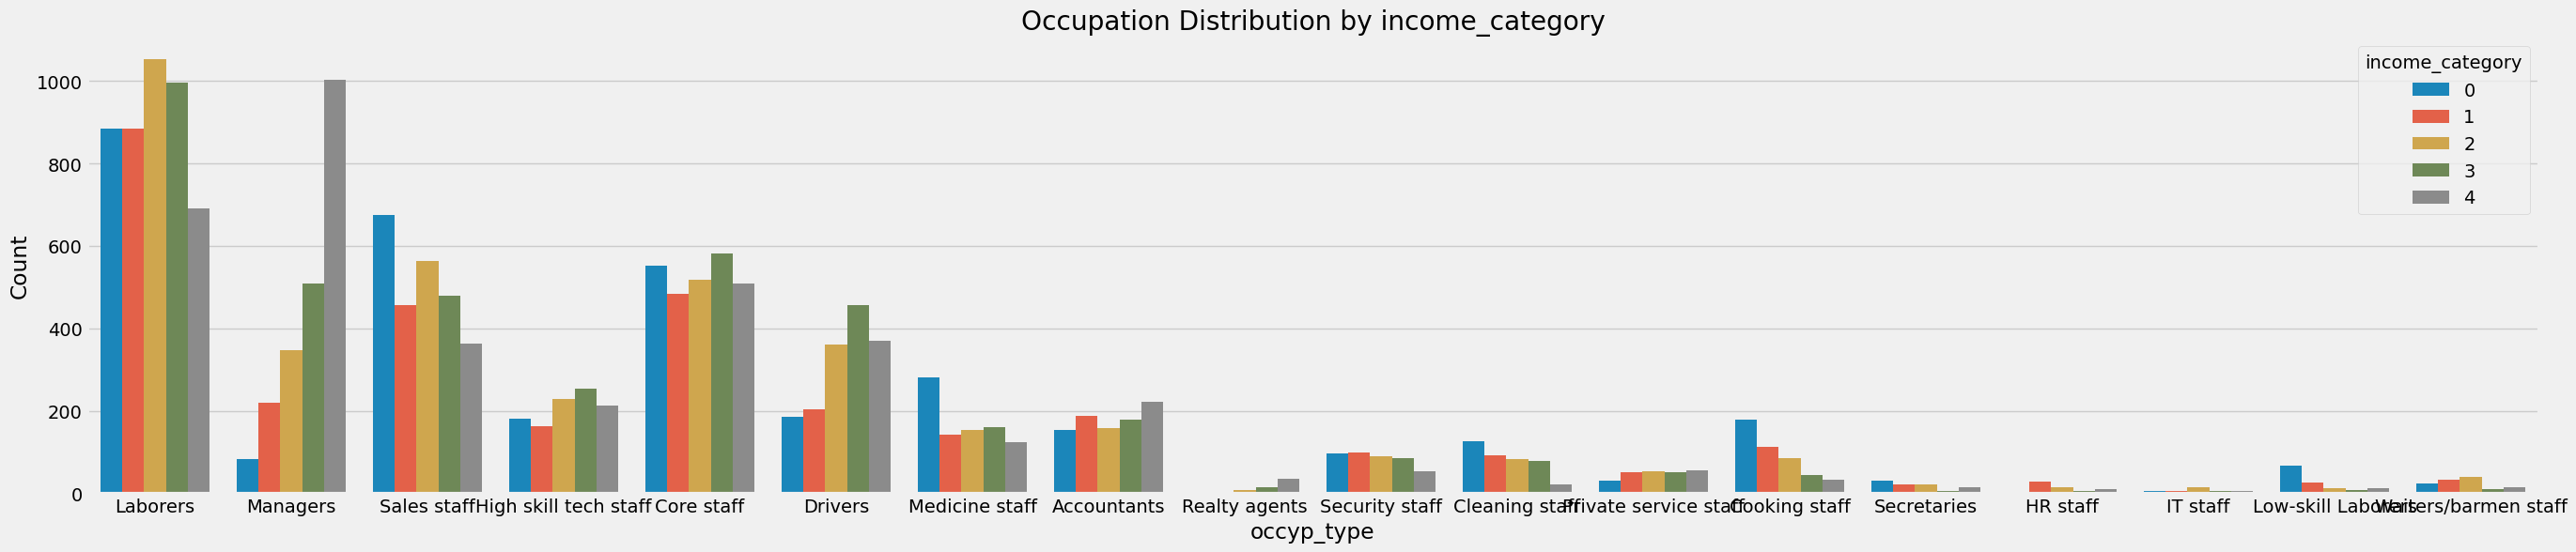

In [ ]:
# 직업군(occyp_type)별 'income_category' 분포 시각화
plt.figure(figsize=(30, 6))
sns.countplot(x='occyp_type', hue='income_category', data=train)

# 그래프의 제목과 축 레이블을 설정
plt.title('Occupation Distribution by income_category')
plt.xlabel('occyp_type')
plt.ylabel('Count')

plt.legend(title='income_category', loc='upper right')

plt.show()

#여기서 그래프 모양이 비슷한 sales staff, cleaning staff, cooking staff(+low skill 노동자)는 저임금 스태프로 묶어주는 정도는 괜찮을 것 같기도.
#reality agents도 매니저처럼 고임금이 많다.

# 결혼과 가족: family_type(결혼 여부), family_size, child_num

In [ ]:
train['family_size'].value_counts()
#기존 데이크루 활동에서 가족 수대로 연간소득을 나누기도 했음.

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [ ]:
train['family_type'].value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

In [ ]:
train['child_num'].value_counts() #20인 가족이 진짜 있나보다...

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

family_type: Married vs Civil marriage

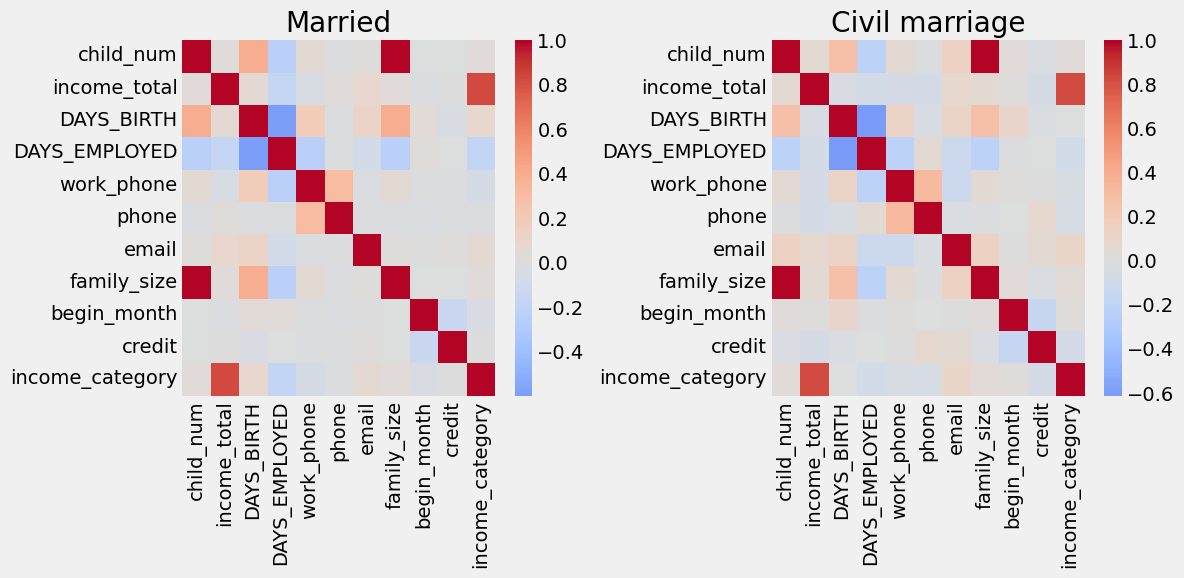

In [ ]:
# 'family_type'이 'Married'인 경우와 'Civil marriage'인 경우의 상관관계 행렬
Married_corr = train[train['family_type'] == 'Married'].corr()
civil_marriage_corr = train[train['family_type'] == 'Civil marriage'].corr()

# 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(Married_corr, cmap='coolwarm', center=0)
plt.title("Married")

plt.subplot(1, 2, 2)
sns.heatmap(civil_marriage_corr, cmap='coolwarm', center=0)
plt.title("Civil marriage")

plt.tight_layout()
plt.show()

#xx('Married'인 경우와 'Civil marriage'인 경우 다른 변수들과의 상관관계가 크게 다르지는 않은 느낌. 둘 다 그냥 '결혼'으로 묶어도 될까?)

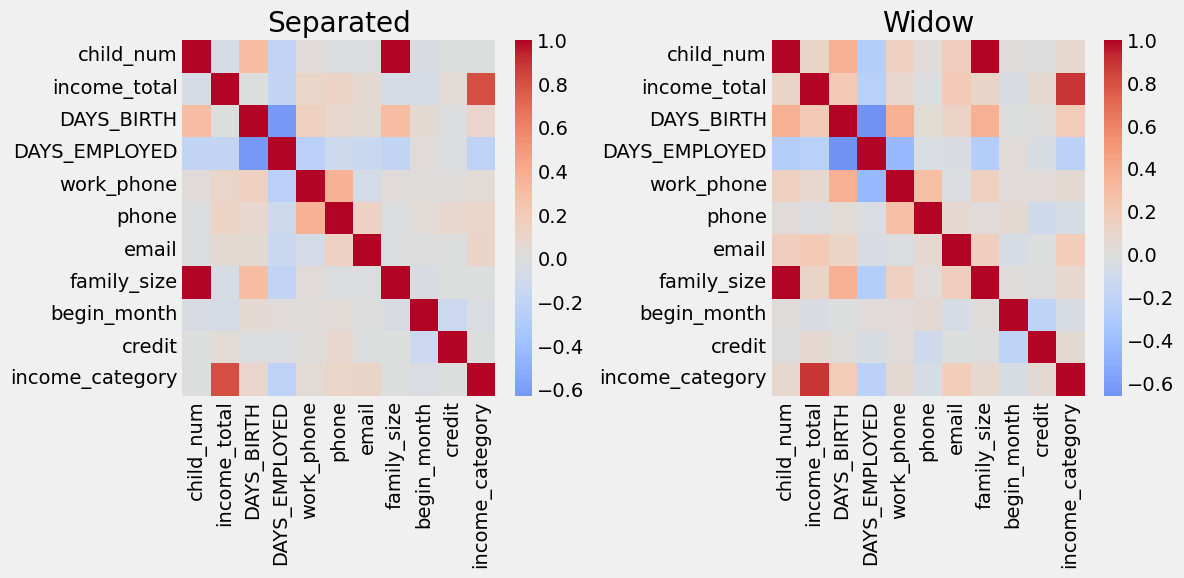

In [ ]:
# 'family_type'이 'Separated'인 경우와 'Widow'인 경우의 상관관계 행렬
Separated_corr = train[train['family_type'] == 'Separated'].corr()
civil_marriage_corr = train[train['family_type'] == 'Widow'].corr()

# 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(Separated_corr, cmap='coolwarm', center=0)
plt.title("Separated")

plt.subplot(1, 2, 2)
sns.heatmap(civil_marriage_corr, cmap='coolwarm', center=0)
plt.title("Widow")

plt.tight_layout()
plt.show()

#'Separated'와 'Widow'도 비슷하지 않을까?

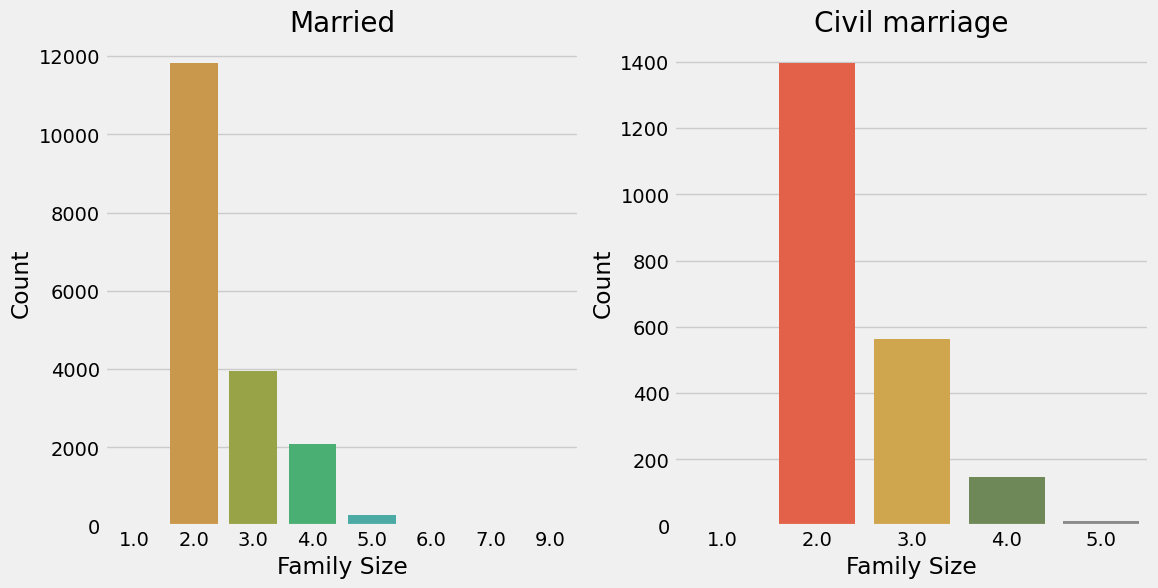

In [ ]:
# 'family_type'이 'Married'인 사람들의 'family_size'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='family_size', data=train[train['family_type'] == 'Married'])
plt.title("Married")
plt.xlabel("Family Size")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
# 'family_type'이 'Civil marriage'인 사람들의 'family_size'
sns.countplot(x='family_size', data=train[train['family_type'] == 'Civil marriage'])
plt.title("Civil marriage")
plt.xlabel("Family Size")
plt.ylabel("Count")

plt.show()

In [ ]:
train.loc[train['family_type'] == 'Married', 'family_size'].value_counts()

2.0    11828
3.0     3947
4.0     2091
5.0      273
6.0       43
7.0        9
1.0        3
9.0        2
Name: family_size, dtype: int64

In [ ]:
train.loc[train['family_type'] == 'Civil marriage', 'family_size'].value_counts()

2.0    1397
3.0     563
4.0     148
5.0      14
1.0       1
Name: family_size, dtype: int64

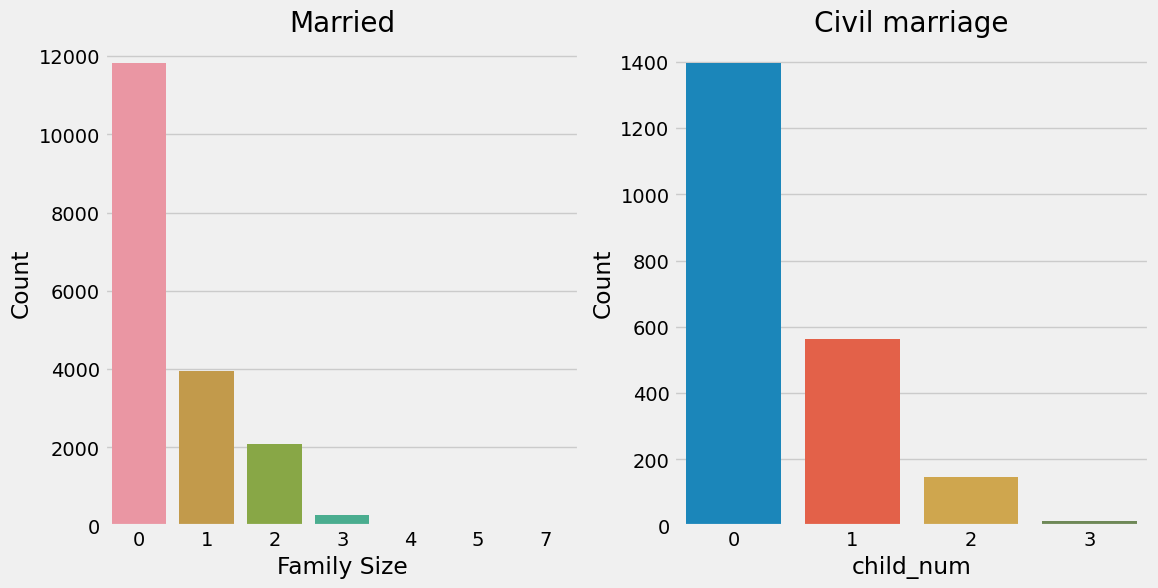

In [ ]:
# 'family_type'이 'Married'인 사람들의 'child_num'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='child_num', data=train[train['family_type'] == 'Married'])
plt.title("Married")
plt.xlabel("Family Size")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
# 'family_type'이 'Civil marriage'인 사람들의 'child_num'
sns.countplot(x='child_num', data=train[train['family_type'] == 'Civil marriage'])
plt.title("Civil marriage")
plt.xlabel("child_num")
plt.ylabel("Count")

plt.show()

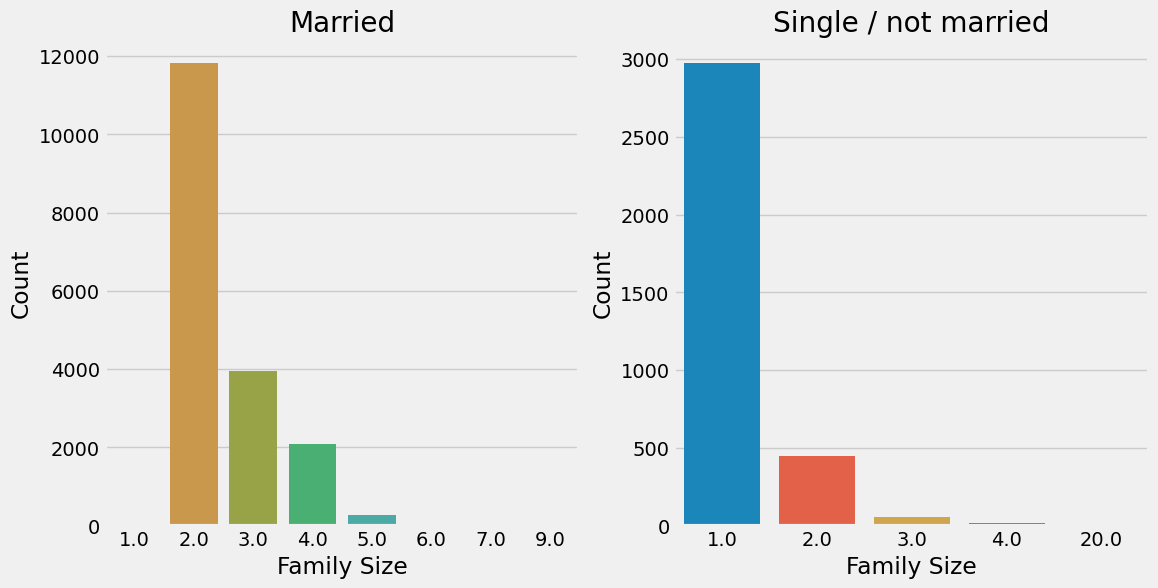

In [ ]:
# 'family_type'이 'Single / not married'인 사람들의 'family_size'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
sns.countplot(x='family_size', data=train[train['family_type'] == 'Single / not married'])
plt.title("Single / not married")
plt.xlabel("Family Size")
plt.ylabel("Count")

# 'family_type'이 'Married'인 사람들의 'family_size'
plt.subplot(1, 2, 1)
sns.countplot(x='family_size', data=train[train['family_type'] == 'Married'])
plt.title("Married")
plt.xlabel("Family Size")
plt.ylabel("Count")

plt.show()

In [ ]:
#family_size는 1인가구 ~ 20인가구까지 있지만 1인가구 ~ 4인이상 가구로 5종류로만 나누는 건 어떨까
# => 그럴 경우 1인 5000 / 2인 14000 / 3인 4500 / 4인이상 2500
train['family_size'].value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [ ]:
#child_num도 1명 ~ 4명 이상으로 나누기
train['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [ ]:
#single, widow, separated를 single 하나로 통일하는 건 어떨까
train['family_type'].value_counts()

# Married (Married, Civil marriage) / Single (single, widow, separated) 로만 나누기

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64